## Morningstar bank data set

Bank names

*   Bank of America
*   CitiGroup
*   Goldman Sachs
*   JPMorgan Chase
*   Morgan Stanley
*   Wells Fargo

https://www.kaggle.com/code/rahulmallik1004/exploratory-data-analysis-of-stock-prices

## <font size=3><b><u> Import Libraries

In [ ]:
# Import the necessary libraries

# Preprocessing
import pandas as pd
import numpy as np

# Randomize the colours of the bars
import random

# Plotting
import matplotlib.pyplot as plt
from matplotlib import style
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns

# Handling dates
import datetime
from datetime import date, timedelta

# Seasonal decompose to see trends, seasonality
from statsmodels.tsa.seasonal import seasonal_decompose




In [ ]:
# Reading the data
df = pd.read_pickle('all_banks.pickle')

df.head()

In [ ]:
df.tail()

In [ ]:
df.describe().T

In [ ]:
df.info()

In [ ]:
df.shape, df.columns

Stock Market Analysis means analyzing the current and historical trends in the stock market to make future buting and selling decisions

Steps: 
1. Checking prices at the start and the end of the day
2. Get highest and lowest prices
2. Using a candlestick chart to analyze the price movement of stock prices
3. Visualizing the data


## <B><u>EXPLORATORY DATA ANALYSIS

### <font size = 4> <b> <u>Find Null Values

In [ ]:
#Finding Null Rows
#No nulls
df.isna().values.any()

### <font size = 4> <b> <u>Find Duplicates

In [ ]:
# Get the number of rows
previous_count = len(df.index)

duplicateRows = df.duplicated(keep=False)

print(f'Duplicated rows: \n \n {df[duplicateRows]}')


In [ ]:
# Dropping the duplicates (IF NEED BE)
df = df.drop_duplicates()
print(f'{previous_count - len(df.index)} duplicates were dropped')

In [ ]:
df_reset = df.reset_index()
df_reset.info()

In [ ]:
df[('BAC','High')]

### <font size = 4> <b> <u>Find Outliers


### <font size = 4> <b> <u>Find Correlation

In [177]:
# Correlation of closing prices
for bank, price_type in df.columns:
    if price_type == 'Close':
        sns.heatmap(df[bank, price_type].corr(), annot=True, cmap='summer')

TypeError: Series.corr() missing 1 required positional argument: 'other'

## Visualization

## <b><u>Analysis

### <font size = 4> <b> <u>Univariate Analysis

In [ ]:
bank_names = df.columns.get_level_values(0).unique()

# Create a figure with 2 rows and 2 columns of subplots
fig, axes = plt.subplots(nrows=len(bank_names), ncols=4, figsize=(20,30))

for i, bank_name in enumerate(bank_names):
    # Select data for the current bank
    bank_data = df.loc[:, bank_name]

    # Plot the open prices in the top left subplot
    bank_data['Open'].plot(ax=axes[i, 0])
    axes[i, 0].set_title(f'Open Prices for {bank_name}')

    # Plot the high prices in the top right subplot
    bank_data['High'].plot(ax=axes[i, 1])
    axes[i, 1].set_title(f'High Prices for {bank_name}')

    # Plot the low prices in the bottom left subplot
    bank_data['Low'].plot(ax=axes[i, 2])
    axes[i, 2].set_title(f'Low Prices for {bank_name}')

    # Plot the close prices in the bottom right subplot
    bank_data['Volume'].plot(ax=axes[i, 3])
    axes[i, 3].set_title(f'Volumes for {bank_name}')

plt.tight_layout()
plt.show()

In [ ]:
# Identifying outliers using scatterplots (to identify outliers)
'''
fig, axs = plt.subplots(10, 3)
tabs = ['orange', 'green', 'red', 'blue']

for i , column in zip([i for i in range(0, 10)], df.columns):
  for j in range(0,3):
    axs[i][j].plot(df.index, df[column], f'tab:{tabs[j]}')    # tabs change the color of the plotted points
'''
# plt.scatter(df['BAC']['High'].index, df['BAC']['High'].values)
# TODO: Tidy up the subplots

### <font size = 4> <b> <u>Candle Stick Analysis

#### <font size = 3> <b> <u> Bank BAC only

In [ ]:
df['BAC']['High'].plot(label='Stocks at High', figsize=(16,10))
df['BAC']['Low'].plot(label='Stocks at Low')
df['BAC']['Close'].plot(label='Stocks at Close')
df['BAC']['Open'].plot(label='Stocks at Open')
plt.legend()
plt.title('BAC bank stock prices')
plt.style.use('fivethirtyeight')
plt.show()

### <font size = 4> <b> <u> High Share Prices for different banks

In [ ]:
for bank, price_type in df.columns:
    if price_type == 'High':
        df[bank, price_type].plot(label = bank, figsize=(16,10))
        plt.legend()
        plt.title(f'{bank} High share prices')
plt.style.use('fivethirtyeight')
plt.show()
        

### <font size = 4> <b> <u>High Share Prices for Individual Banks

In [ ]:
# Individual Banks
for bank, price_type in df.columns:
    if price_type == 'High':
        df[bank, price_type].plot(label = bank, figsize=(16,10))
        plt.legend()
        plt.title(f'{bank} High share prices')
        plt.style.use('fivethirtyeight')
        plt.show()

### <font size = 4> <b> <u> Low Share Prices

In [ ]:
# Comparison of Low stock prices for different banks
for bank, price_type in df.columns:
    if price_type == 'Low':
        df[bank, price_type].plot(label = bank, figsize=(16,10))
        plt.legend()
        plt.title(f'{bank} Low Share Prices')
plt.style.use('fivethirtyeight')
plt.show()

#Individual Banks
for bank, price_type in df.columns:
    if price_type == 'Low':
        line_colour = (random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1))
        df[bank, price_type].plot(label = bank, figsize=(16,10), color = line_colour)
        plt.legend()
        plt.title(f'{bank} Low Share prices')
        plt.style.use('fivethirtyeight')
        plt.show()

### <font size = 4> <b> <u> Average Share Prices per bank

In [ ]:


# Comparison of average stock prices for different banks
((df['BAC']['High'] + df['BAC']['Low'])/2).plot(label='Bank of America', figsize=(16,10))
((df['C']['High'] + df['C']['Low'])/2).plot(label='CitiGroup')
((df['GS']['High'] + df['GS']['Low'])/2).plot(label='Goldman Sachs')
((df['JPM']['High'] + df['JPM']['Low'])/2).plot(label='JPMorgan Chase')
((df['MS']['High'] + df['MS']['Low'])/2).plot(label='Morgan Stanley')
((df['WFC']['High'] + df['WFC']['Low'])/2).plot(label='Wells Fargo')
plt.legend()
plt.title('All banks average stock prices')
plt.style.use('fivethirtyeight')
plt.show()

### <font size = 4> <b> <u> Open Share Prices

In [ ]:
# Open Stock Prices
# Alpha - control transparency
for bank, price_type in df.columns:
    if price_type == 'Open':
        bars_colour = (random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1))
        df[bank, price_type].plot(kind='hist', bins=30, alpha=0.8, figsize=(16,10), color = bars_colour)
        plt.xlabel('Open Share Price')
        plt.ylabel('How many times it appears')
        plt.title(f'{bank} Open share prices')
        plt.show()

In [ ]:
# # Area Plot for volume traded
# for bank, price_type in df.columns:
#     if price_type == 'Volume':
#         bars_colour = (random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1))
#         df[bank, price_type].plot(kind='area', stacked=False, alpha=0.5, color = bars_colour)
#         plt.xlabel('Volume Traded')
#         plt.ylabel('How many times it appears')
#         plt.title(f'{bank} Volume of Shares Traded')
#         plt.show()

### <font size = 4> <b> <u> BIVARIATE ANALYSIS

### <font size = 4> <b> <u> SKEWNESS

In [ ]:
skewness = df.skew()

print("The skewness of the data is: ", skewness)

### <font size = 4> <b> <u>Moving Average Calculation</b></u>
<p><font size = 3> 
- The most commonly used moving average is the simple moving average, which takes the average of the current data point and the previous n-1 data points, where n is the window size. The moving average can be used to make predictions about future data points, such as stock prices or economic indicators. eg. if the last 5 days closed at the mean price of 5 tomorrow will close at 5
</p>

In [ ]:
# 20 previous data
window = 20
for bank_name, price_type in df.columns:
    if price_type == 'Close':
        # Calculate the moving average of the close prices
        df[bank_name,'close_ma'] = df[bank_name,price_type].rolling(window).mean()

        # Plot the original close prices and the moving average
        df.plot(x='Date', y=[(bank_name,'Close'), (bank_name,'close_ma')])
        plt.title(f'{bank_name} Closing Moving Average over the previous 20 days')

### <font size = 4> <b> <u>Daily Percentage Returns</b></u>

### <font size = 4> <b> <u>Close Data Frame for closing Share Analysis</b></u>

In [178]:
close=pd.DataFrame()

In [189]:
df.columns

MultiIndex([(          'index',         ''),
            (           'Date',         ''),
            (            'BAC',    'Close'),
            (            'BAC',     'High'),
            (            'BAC',      'Low'),
            (            'BAC',     'Open'),
            (            'BAC',   'Volume'),
            (              'C',    'Close'),
            (              'C',     'High'),
            (              'C',      'Low'),
            (              'C',     'Open'),
            (              'C',   'Volume'),
            (             'GS',    'Close'),
            (             'GS',     'High'),
            (             'GS',      'Low'),
            (             'GS',     'Open'),
            (             'GS',   'Volume'),
            (            'JPM',    'Close'),
            (            'JPM',     'High'),
            (            'JPM',      'Low'),
            (            'JPM',     'Open'),
            (            'JPM',   'Volume'),
          

In [190]:
close['BAC']=df['BAC','Close']
close['C']=df['C','Close']
close['GS']=df['GS','Close']
close['JPM']=df['JPM','Close']
close['MS']=df['MS','Close']
close['WFC']=df['WFC','Close']

In [191]:
close.head()

,BAC,C,GS,JPM,MS,WFC
0,46.15,485.3,127.71,39.69,47.1008,31.415
1,47.08,492.9,128.87,40.19,48.4041,31.900
2,46.58,483.8,127.09,39.62,48.4373,31.530
3,46.64,486.2,127.04,39.74,48.5701,31.495
4,46.57,486.2,128.84,40.02,48.6199,31.680


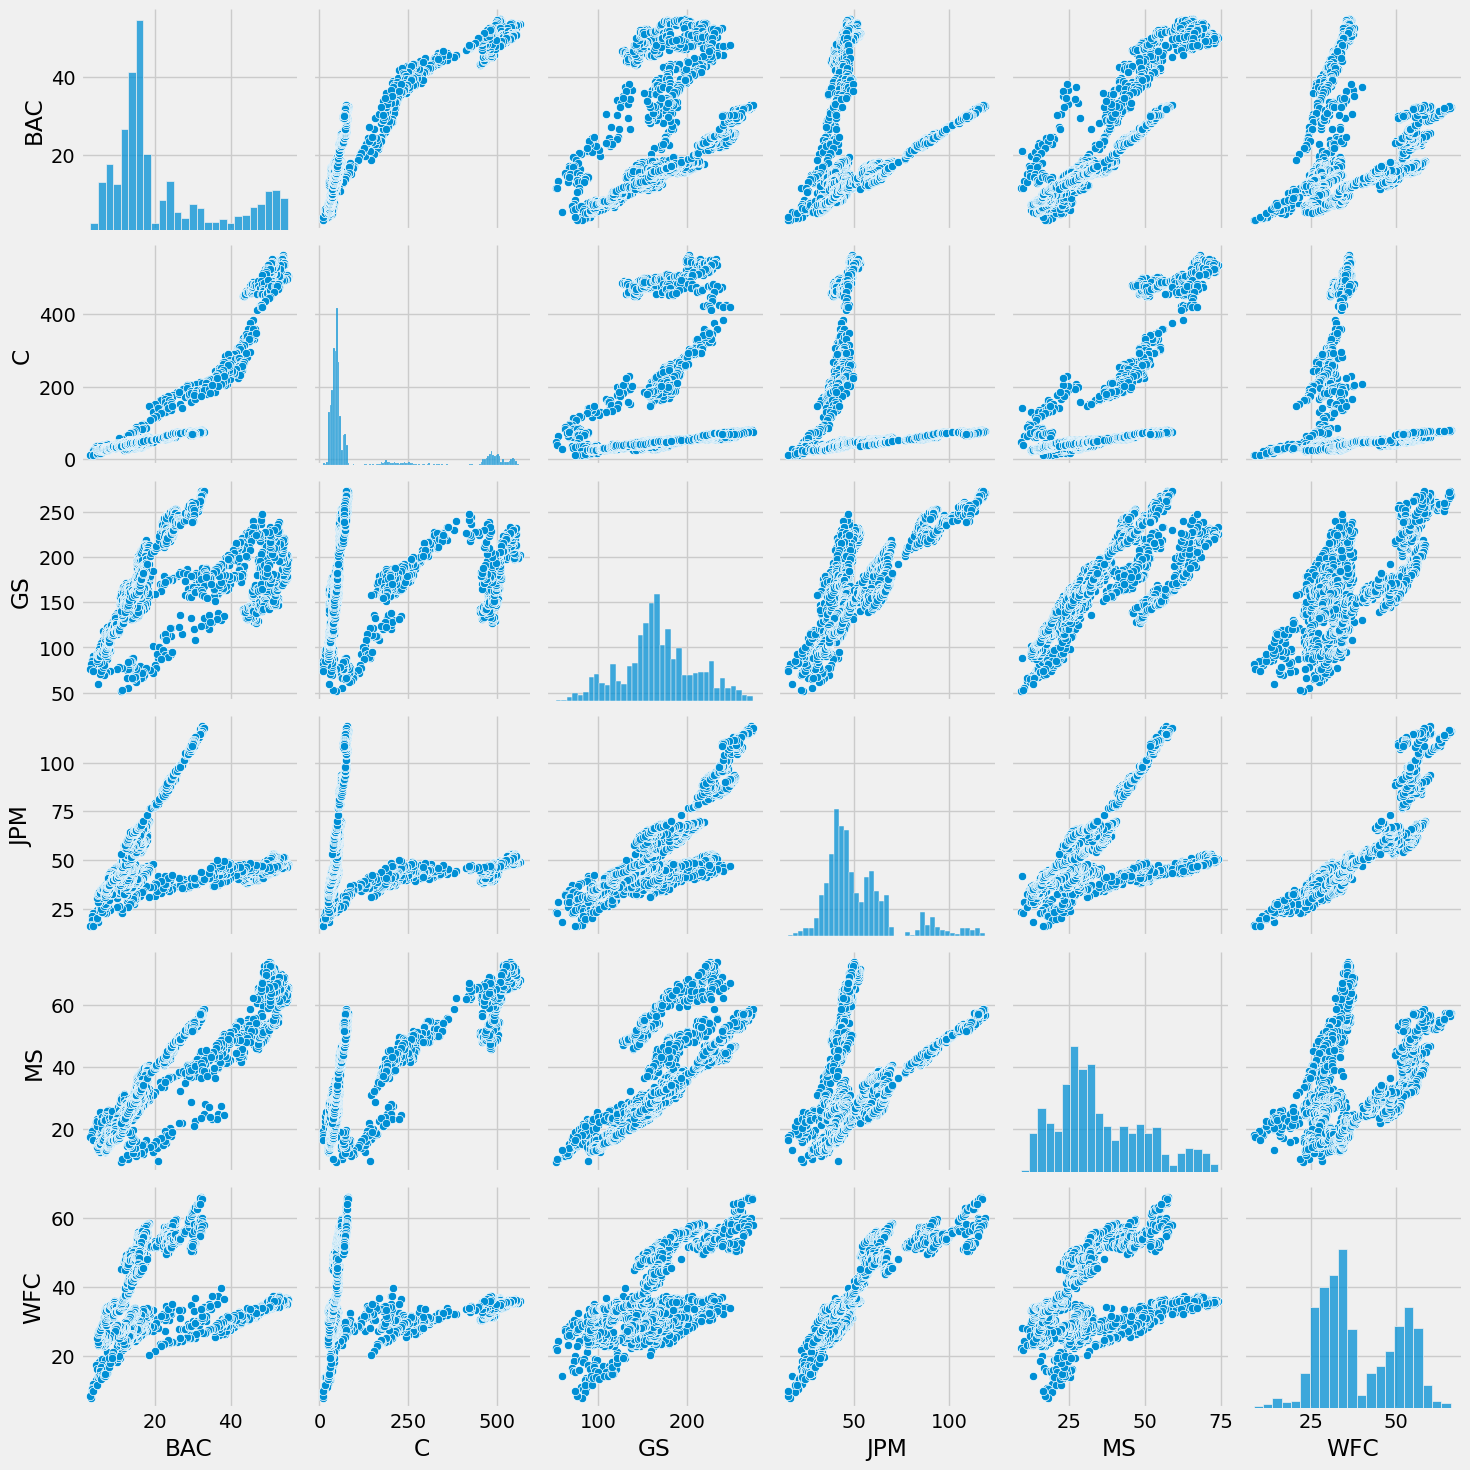

In [192]:
sns.pairplot(data=close)

## <font size = 6><b><u>Date Manipulation</u></b>
<p><font size = 3>
- start date: 2006-01-02 00:00:00(2nd January 2006)<br>
- last date: 2018-04-30 00:00:00(30th April 2018)
</p>

In [ ]:
df = df.reset_index(level=0)
df.head()

In [ ]:
df['Date'].head()

In [ ]:
df['Date'].isna().values.any()

In [ ]:
df['Date'].describe()

In [ ]:

df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['day_of_the_week'] = df['Date'].dt.day_name()
df['quarter'] = df['Date'].dt.quarter
df.head()

### <font size = 5> <u>Quarter Of The Year

In [ ]:
df.groupby('quarter').count()

### <font size = 5> <u> Day Of The Week

In [ ]:
for bank, price_type in df.columns:
    if price_type == 'Close':
        days_grouped = df.groupby('day_of_the_week')[bank, price_type].count().mean()
        days_grouped
        # Plot the result
        # days_grouped.plot(kind='bar')
        # plt.show()


In [ ]:
# Best Performing Day
# df['day_of_the_week'].describe()
# for bank, price_type in df.columns:
#     if price_type == 'Close':
#         # result = seasonal_decompose(price_type)
#         grouped = df.groupby('day_of_the_week').mean()[bank,price_type]

# # Plot the result
#         grouped.plot(kind='bar')
#         # df.groupby([bank, price_type]).plot(label = bank, figsize=(16,10))
#         plt.show()

### <font size = 5> <u> Months

In [ ]:
# Best Performing Month

### <font size = 5> <u> Year


In [ ]:
# Best perfoming Year per bank

In [ ]:
# Seasonal Decomposition
for bank, price_type in df.columns:
    if price_type == 'Close':
        # result = seasonal_decompose(price_type)
        seasonal_decompose(df[bank, price_type]).plot(label = bank, figsize=(16,10))
        plt.show()

## <font size = 5> <u> Seasonal Decomposition Plot</u>
<p><font size = 3>
- Splits time series into its constituent parts, including seasonality, trend, and residual components. The seasonal decomposition plot displays the seasonal, trend, and residual components of the time series data as separate plots. <br>
- The seasonal plot shows the repeating patterns in the data, the trend plot shows the underlying direction of the data, and the residual plot shows the residuals after removing the trend and seasonality
</p>

In [ ]:
result=seasonal_decompose(df[('BAC','Close')], model='multiplicable', period=12)
result.seasonal.plot()

## <font size = 5> <u> Linear Regression</u>
<p><font size = 3>
- Check for Normality, Homoscedacity 
</p>